In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [2]:
df= pd.read_excel('./859181_INDICES_v_3_conductas_completas.xlsx', header= 4)

In [3]:
df ['Fecha']=pd.to_datetime(df['Fecha'])
df.head()

,Unnamed: 0,SP,Fecha,Resol. No.,Empresas,Mercado,Categoria,Conducta,Art. Ley LDC (Formato Art. X Inc. x). Ley 25.156,Sancion,DETALLE,Unnamed: 11
0,NaN,326599,2002-10-17,46,"Beverage Associates Corp, Quilmes Industrialm ...",Mercado de la cerveza,bebidas,Carteles - Acuerdo de Precios - Archivo,Art. 2 Inc. 1,Archivo,Realización de una operación de concentración ...,NaN
1,NaN,323089,1980-11-09,[127],The Buenos Aires Herald Ltda. / Sociedad de Di...,Distribución de diarios.,comunicacion,Distribución - Negativa -,NaN,Archivo,_,NaN
2,NaN,321373,1981-04-12,124,Acindar Industria Argentina de Aceros S.A. / S...,MANUFACTURING Fabricación de metales comunes -...,energia,Póliticas de precios - Guerra de precios - Con...,NaN,Archivo,Para que la guerra de precios pueda considerar...,NaN
3,NaN,321185,1981-08-09,257,Juan Ignacio Borchex y Oscar Dos Reis / Asocia...,Servicio funerario,funerario,Abuso de posición dominante,NaN,Archivo,Extensión de servicio mutual a personas no mut...,NaN
4,NaN,321190,1981-08-18,302,Tiboni y Cía S.R.L. / Sorensen y Cía. S.R.L.,Pantógrafos (calado o perforado de cristales p...,automotor,Trato exclusivo - patentes,NaN,Archivo,La denunciada ejerció una serie de presiones s...,NaN


In [4]:
#convertir todas las que son str lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

#eliminar los simbolos
df['Mercado'] = [re.sub("[\W+]",' ', str(x)) for x in df['Mercado']]
df['Conducta']= [re.sub("[\W+]",' ', str(x)) for x in df['Conducta']]

##convertir esto en una lista de palabras a eliminar.
filtrar = ['mercado', 'servicio', 'servicios', 'fabricación', 'fabricacion', 'fabricacion', 'manufacturing', 'mencionado', 'productos']
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))
filtrar1 = ['archivo', 'nan'] 
df ['Conducta'] = df ['Conducta'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar1)]))

#eliminamos las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
df['Mercado'] = df['Mercado'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['Conducta'] = df['Conducta'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

##Tareas: en donde es nan el mercado, buscar completar. 
df.replace('', np.nan, inplace=True)

In [5]:
###df["Categoria"].replace({"television": "comunicacion"}, inplace=True)

In [6]:
df_comu = df [df["Categoria"] == "comunicacion"].copy()
df_comu.reset_index(drop=True, inplace=True)
df_comu.shape

(78, 12)

In [7]:
df_comu.drop(['Unnamed: 0'], axis=1, inplace=True)
df_comu.drop(['Unnamed: 11'], axis=1, inplace=True)

In [8]:
df_comu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   SP                                                74 non-null     object        
 1   Fecha                                             78 non-null     datetime64[ns]
 2   Resol. No.                                        78 non-null     object        
 3   Empresas                                          78 non-null     object        
 4   Mercado                                           78 non-null     object        
 5   Categoria                                         78 non-null     object        
 6   Conducta                                          72 non-null     object        
 7   Art. Ley LDC (Formato Art. X Inc. x). Ley 25.156  20 non-null     object        
 8   Sancion                         

In [9]:
# Select observations between two datetimes
df_5= df_comu[(df_comu['Fecha'] > '2015-1-1 01:00:00') & (df_comu['Fecha'] <= '2020-1-1 04:00:00')]

In [10]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 53 to 77
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   SP                                                21 non-null     object        
 1   Fecha                                             25 non-null     datetime64[ns]
 2   Resol. No.                                        25 non-null     object        
 3   Empresas                                          25 non-null     object        
 4   Mercado                                           25 non-null     object        
 5   Categoria                                         25 non-null     object        
 6   Conducta                                          20 non-null     object        
 7   Art. Ley LDC (Formato Art. X Inc. x). Ley 25.156  20 non-null     object        
 8   Sancion                        

In [11]:
# Select observations between two datetimes
df_5= df_comu[(df_comu['Fecha'] > '2015-1-1 01:00:00') & (df_comu['Fecha'] <= '2020-1-1 04:00:00')]

#eliminar los simbolos
df_5['Resol. No.'] = [re.sub("[\D+]",'', str(x)) for x in df_5['Resol. No.']]
lista= df_5 ['Resol. No.'].unique()
lista
##eliminar el 187 porque los que trae no son consistentes. 
#convertir a float. 

<ipython-input-11-56d0e06b249e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['Resol. No.'] = [re.sub("[\D+]",'', str(x)) for x in df_5['Resol. No.']]


array(['187', '271', '438', '132', '181', '189', '775', '324', '913',
       '114', '28', '600', '258', '471', '29', '463', '25', '595', '14'],
      dtype=object)

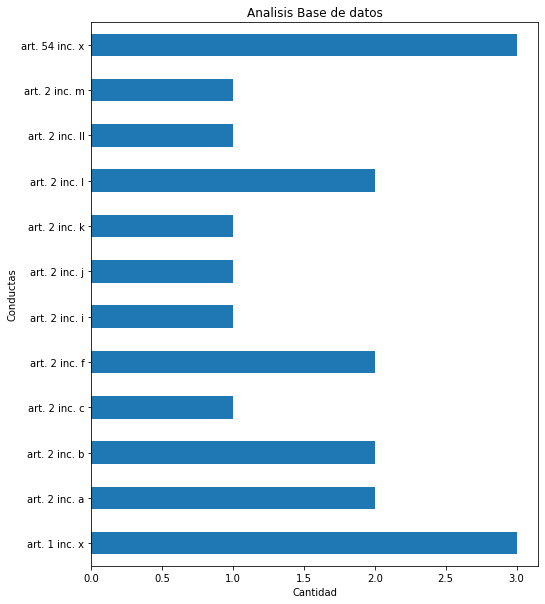

In [15]:
plt.figure(figsize=(8,10))
df_5.groupby(['Art. Ley LDC (Formato Art. X Inc. x). Ley 25.156']).size().plot(kind='barh')
plt.ylabel('Conductas')
plt.xlabel('Cantidad')
plt.title('Analisis Base de datos')
plt.savefig('Comunicacion')
plt.show()
